In [2]:
## Import the libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
## Read the PDF file, have a general and exploratory analysis of the data
df = pd.read_csv("wine-clustering.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


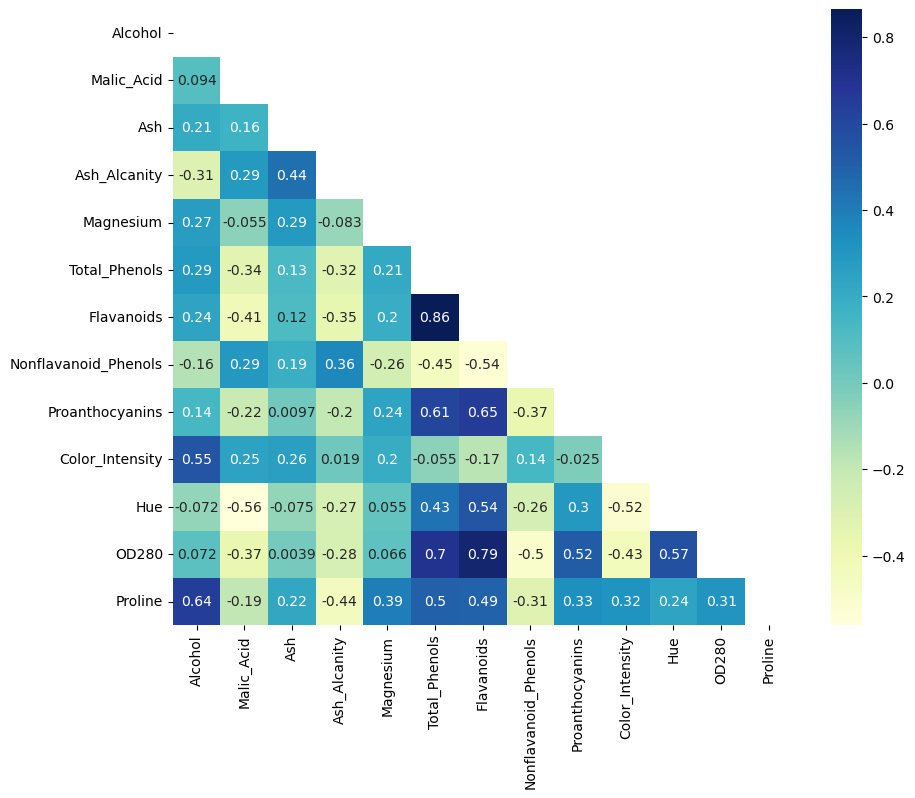

In [4]:
## Since the data is preloaded it does not contain any null values. Now lets look at the correlation between the 
#different attribues using a heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask);

In [5]:
# Some attributes such as Proline, Flavonoids and Phenold seem to have a positive correlation with each other. 
# Other attributes such as Hues have negative correlation. 
#The next step is to analyse the data using clustering technique.
from scipy.cluster.vq import whiten, kmeans, vq
scaled_df = whiten(df)
print(scaled_df)

[[17.57782045  1.53500398  8.88247841 ...  4.56283226  5.53677584
   3.39148583]
 [16.30549754  1.5978404   7.82242955 ...  4.60670565  4.80230557
   3.34371843]
 [16.25608694  2.11848502  9.75976023 ...  4.51895888  4.47744372
   3.77362508]
 ...
 [16.39196609  3.84199826  8.26107046 ...  2.58852984  2.20341079
   2.65905227]
 [16.26843959  2.32494755  8.66315796 ...  2.63240323  2.28815736
   2.67497474]
 [17.45429396  3.6804189  10.0156341  ...  2.67627662  2.2599085
   1.78331649]]


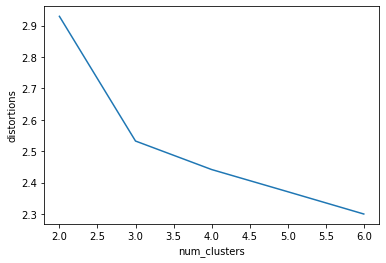

In [6]:
# First we normalise the data and determine the optimum number clusters on a elbow diagram. 
# we use K means clustering technique for this dataset
distortions = []
num_clusters = range(2, 7)
for i in num_clusters:
    centroids, distortion = kmeans(scaled_df, i)
    distortions.append(distortion)
elbow_df = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data=elbow_df)
plt.show()

In [7]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [6]:
scaled_df = pd.DataFrame(scaled_df, columns=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'])

In [7]:
# Applying the K means
cluster_centers, distortion = kmeans(scaled_df, 3)
scaled_df['label'], distortions_list = vq(scaled_df, cluster_centers)

In [8]:
labels = scaled_df['label']
scaled = scaled_df.drop('label', axis=1)
print(scaled.columns)
print(labels)

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')
0      1
1      1
2      1
3      1
4      1
      ..
173    2
174    2
175    2
176    2
177    2
Name: label, Length: 178, dtype: int32


In [9]:
# next, we plot the clusters on the PCA plot with color options
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(scaled)
X = model.transform(scaled)

In [10]:
X_final = pd.DataFrame(X, columns=['X', 'Y'])
X_final.head()

,X,Y
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [11]:
labels = pd.DataFrame(labels, columns=['label'])
dfs = [X_final, labels]
final_df = pd.concat(dfs, axis=1)
final_df.head()

,X,Y,label
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1


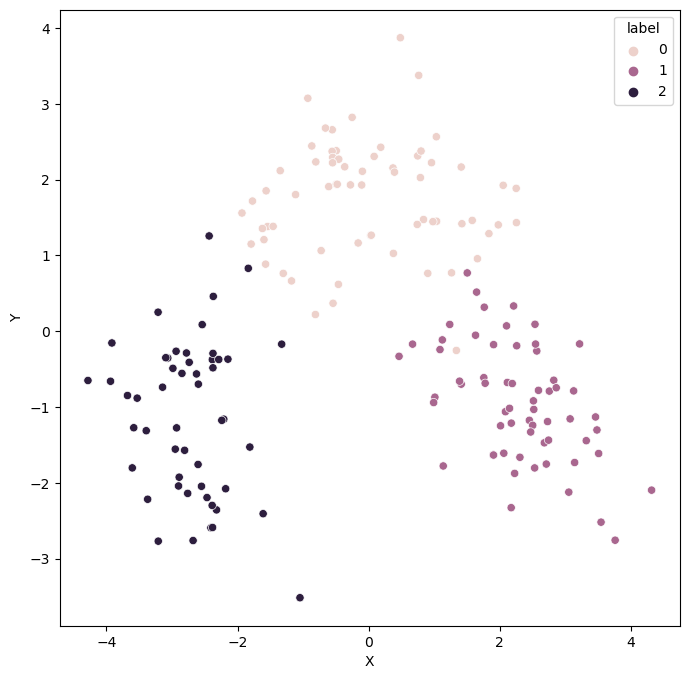

In [12]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='X', y='Y', hue='label', data=final_df);

In [2]:
# Finally, k-Means with n_clusters = 3 yielded a plot which grouped the data into three clusters 
#based around their centroids and based upon the first and second principal components.